In [216]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

sns.set()

In [277]:
# saving flag for figures
SAVE_FIGS = False

# Read and merge data

In [218]:
date_cols = ['VorgangsDatum', 'ErledigungsDatum', 'ErstellungsDatum']
files = glob.glob('./Rohdaten/*.csv')
for idx, file in enumerate(files):
    df = pd.read_csv(file, sep=';', encoding='cp1252', parse_dates=date_cols, dayfirst=True)
    
    if idx == 0:
        data = df.copy()
    else:
        data = pd.concat([data, df], ignore_index=True)

In [219]:
data

VorgangsID  ObjektID  \
0          105360      4594   
1            7257       241   
2            7317         0   
3           31673      4569   
4           32908       467   
...           ...       ...   
10453      170528     12020   
10454      169408      8799   
10455      173874      3203   
10456      171476      1183   
10457      172470      4562   

                                             HObjektText  VorgangsTypID  \
0                          DU-04, Instandhaltung Küche,               2   
1                                 DU-LA-H12-10, ROB007,               2   
2                                              HB-HVW-EG              2   
3       HB-LA-H1-20, Funkfernbedienung Kran 12A0357, HBC              2   
4                 DU-LA-H09-07, Schnelllauftor Halle 9,               2   
...                                                  ...            ...   
10453  A05709, D, 91332 - Heiligenstadt, Stücht 21, H...              2   
10454  A04418, C, 08396 - Waldenburg, Thomas-Müntzer-...              2   
10455  A01623, C, 91275 - Auerbach, Niedernhof 1, Jür...              2   
10456  A00601, C, 95659 - Arzberg, Garmersreuth 11, H...              2   
10457  A02298, D + P, 82444 - Schlehdorf, Raut 41, Ku...              2   

      VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0        2023-02-16                 2                   0   
1        2021-11-25                 0                   0   
2        2021-11-30                 0                   0   
3        2022-03-14                 0                   0   
4        2022-07-28                 5                   0   
...             ...               ...                 ...   
10453    2022-03-30                 4                   0   
10454    2022-04-13                 4                   1   
10455    2022-05-16                 4                   0   
10456    2022-04-13                 4                   0   
10457    2022-04-26                 4                   0   

                                    VorgangsBeschreibung VorgangsOrt  \
0                                                    NaN         NaN   
1      Hi,\n\nschaust Du Dir bitte einmal den Roboter...         NaN   
2                         Türkontakt Haupteingang prüfen   HB-HVW-EG   
3                    Umschalter zeitweise ohne Funktion          NaN   
4                                                    NaN         NaN   
...                                                  ...         ...   
10453  Bitte mit Rechnungsstellung noch warten - Hr. ...         NaN   
10454  24.03.2022 11:00 Uhr (Sebastian Reinel [Tablet...         NaN   
10455  Abholung Verdichter\nHiblow HP-100\nSer.Nr.: 1...         NaN   
10456  06.04.2022 18:38:55 (Sebastian Reinel)\nKunde ...         NaN   
10457  Hr Hacker vorher anrufen, ist in 30 Min da \n0...         NaN   

                                         VorgangsArtText ErledigungsDatum  \
0               DU Neubau Spülmaschine - Neuanschaffungg       2023-03-21   
1      AKL Roboter 007 hat in letzter Zeit Greiferpro...       2021-11-29   
2                                      Türkontakt defekt       2021-11-30   
3                                       Schalter defekt?       2022-03-14   
4                  Warnlampe innen - Leuchtmittel defekt       2022-08-10   
...                                                  ...              ...   
10453                    Überprüfung der Kleinkläranlage       2022-03-30   
10454                         Mehrere Mängel beseitigen.       2022-04-13   
10455                                Abholung Verdichter       2022-05-16   
10456                    Verdichter oder  Steuerung def.       2022-04-13   
10457                          neuen Verdichter einbauen       2022-04-26   

                             ErledigungsArtText  \
0           Service durch externen Dienstleiter   
1                                           NaN   
2      Instandsetzung durch Facility Management   
3     

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10458 entries, 0 to 10457
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   VorgangsID               10458 non-null  int64         
 1   ObjektID                 10458 non-null  int64         
 2   HObjektText              10451 non-null  object        
 3   VorgangsTypID            10458 non-null  int64         
 4   VorgangsDatum            10458 non-null  datetime64[ns]
 5   VorgangsStatusId         10458 non-null  int64         
 6   VorgangsPrioritaet       10458 non-null  int64         
 7   VorgangsBeschreibung     9868 non-null   object        
 8   VorgangsOrt              534 non-null    object        
 9   VorgangsArtText          10458 non-null  object        
 10  ErledigungsDatum         10457 non-null  datetime64[ns]
 11  ErledigungsArtText       8421 non-null   object        
 12  ErledigungsBeschreibung  6330 no

# Analysing data

## Look for duplicates
- complete duplicates where each row contains the same values for all columns

In [221]:
duplicated = data.duplicated()
duplicated.sum()

566

***566 Duplicates***

In [222]:
data_rem_dupl = data.drop_duplicates(ignore_index=True)

In [223]:
len(data_rem_dupl)

9892

In [224]:
data_rem_dupl.head()

VorgangsID  ObjektID                                       HObjektText  \
0      105360      4594                     DU-04, Instandhaltung Küche,    
1        7257       241                            DU-LA-H12-10, ROB007,    
2        7317         0                                         HB-HVW-EG   
3       31673      4569  HB-LA-H1-20, Funkfernbedienung Kran 12A0357, HBC   
4       32908       467            DU-LA-H09-07, Schnelllauftor Halle 9,    

   VorgangsTypID VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0              2    2023-02-16                 2                   0   
1              2    2021-11-25                 0                   0   
2              2    2021-11-30                 0                   0   
3              2    2022-03-14                 0                   0   
4              2    2022-07-28                 5                   0   

                                VorgangsBeschreibung VorgangsOrt  \
0                                                NaN         NaN   
1  Hi,\n\nschaust Du Dir bitte einmal den Roboter...         NaN   
2                     Türkontakt Haupteingang prüfen   HB-HVW-EG   
3                Umschalter zeitweise ohne Funktion          NaN   
4                                                NaN         NaN   

                                     VorgangsArtText ErledigungsDatum  \
0           DU Neubau Spülmaschine - Neuanschaffungg       2023-03-21   
1  AKL Roboter 007 hat in letzter Zeit Greiferpro...       2021-11-29   
2                                  Türkontakt defekt       2021-11-30   
3                                   Schalter defekt?       2022-03-14   
4              Warnlampe innen - Leuchtmittel defekt       2022-08-10   

                         ErledigungsArtText  \
0       Service durch externen Dienstleiter   
1                                       NaN   
2  Instandsetzung durch Facility Management   
3  Instandsetzung durch Facility Management   
4                                       NaN   

                             ErledigungsBeschreibung MPMelderArbeitsplatz  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2  Türkontakt nachjustiert, Schließriegel der Tür...                  NaN   
3  Gehäuse geöffnet, Schalter geprüft, gereinigt,...                  NaN   
4                                  ausgetauscht ..ok                  NaN   

  MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
0                    NaN           NaN       2023-02-01  
1                    NaN           NaN       2021-11-25  
2                    NaN           NaN       2021-11-30  
3                    NaN           NaN       2022-03-14  
4                    NaN           NaN       2022-07-28

**Plot properties without duplicates**

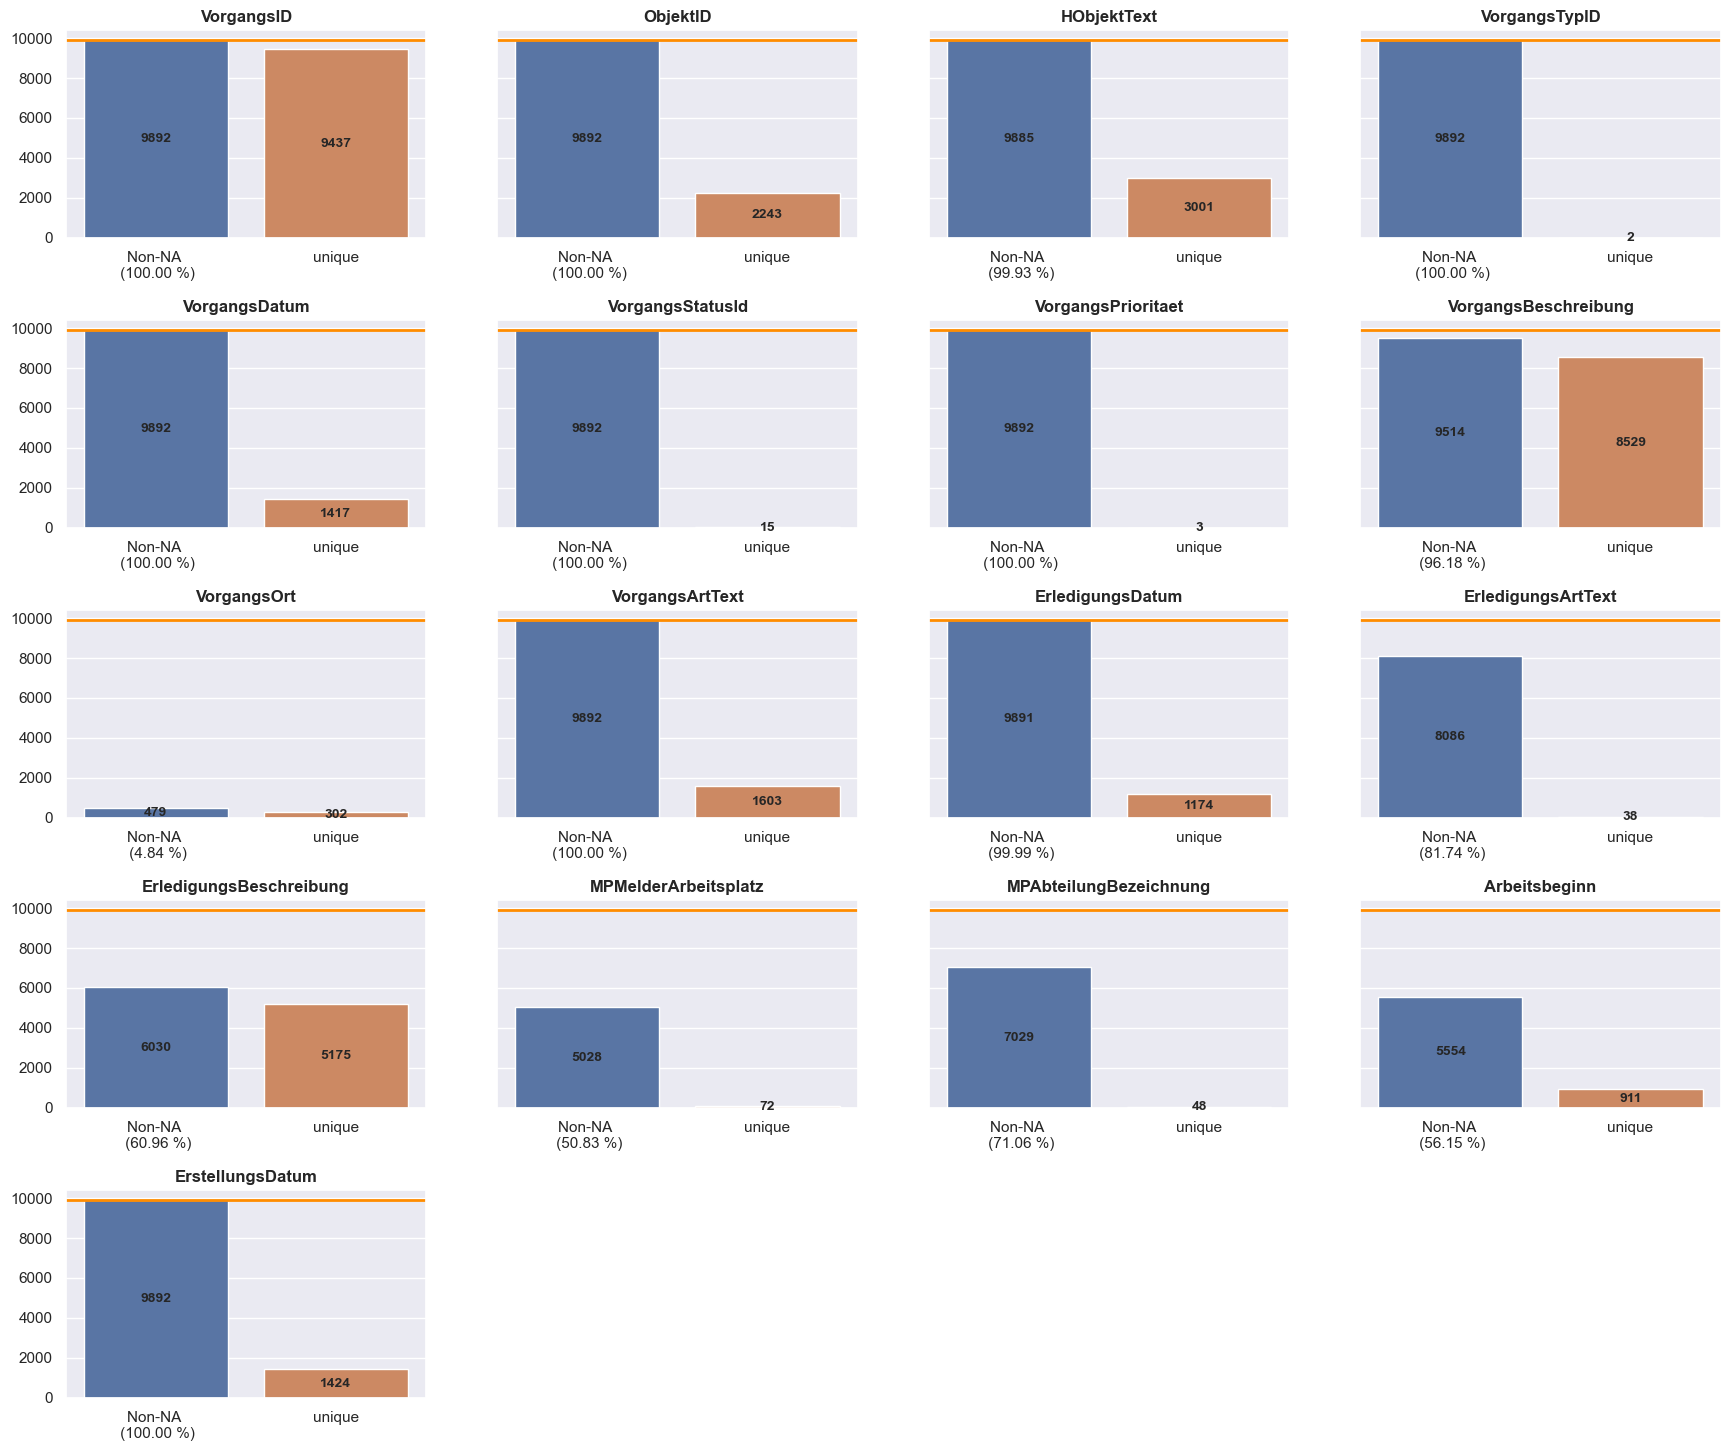

In [225]:
# unique values
unique_vals_info_rem_dupl: dict[str, tuple[int, DataFrame, int, DataFrame]] = dict()

tot_num_entries = len(data_rem_dupl)
n_plots = len(data_rem_dupl.columns)
n_cols = 4
n_rows = n_plots // n_cols

if (n_plots % n_rows) != 0:
    n_rows += 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15), sharey=True)
fig.tight_layout(pad=3.0)


row_idx = 0
col_idx = 0
# each column: unique values, value counter
for col in data_rem_dupl.columns:
    non_nan = data_rem_dupl[col].dropna()
    num_non_nan = len(non_nan)
    unique_vals = pd.unique(non_nan)
    num_uni_vals = len(unique_vals)
    
    unique_vals_info_rem_dupl[col] = (num_non_nan, non_nan, num_uni_vals, unique_vals)
    
    #draw_data = pd.DataFrame(data={'Anzahl Non-NA': [num_non_nan], 'Anzahl unique': [num_uni_vals]})
    
    if col_idx == n_cols:
        col_idx = 0
        row_idx += 1
    
    ax = axes[row_idx, col_idx]
    col_idx += 1
    
    # draw
    chart = sns.barplot(data=[[num_non_nan],[num_uni_vals]], ax=ax)
    chart.axhline(y=tot_num_entries, color='darkorange', linewidth=2)
    fraction_valid_vals = num_non_nan / tot_num_entries * 100
    chart.set_xticklabels([f'Non-NA \n ({fraction_valid_vals:.2f} %)', 'unique'], rotation=0, horizontalalignment='center')
    chart.set_title(col, fontdict={'fontweight': 'bold'})
    text = chart.bar_label(chart.containers[0], label_type='center', rotation=0, fontsize='small', fontweight='bold')


for _ in range(n_rows * n_cols - len(data_rem_dupl.columns)):
    if col_idx == n_cols:
        col_idx = 0
        row_idx += 1
    
    fig.delaxes(axes[row_idx, col_idx])
    col_idx += 1

In [226]:
fig.savefig(fname='NaN-Auswertung.svg')

## NA vals

In [227]:
data = data_rem_dupl.copy()
NA = data.isna()
sum_NA = NA.sum(axis=0)

In [228]:
len(data)

9892

In [229]:
sum_NA

VorgangsID                    0
ObjektID                      0
HObjektText                   7
VorgangsTypID                 0
VorgangsDatum                 0
VorgangsStatusId              0
VorgangsPrioritaet            0
VorgangsBeschreibung        378
VorgangsOrt                9413
VorgangsArtText               0
ErledigungsDatum              1
ErledigungsArtText         1806
ErledigungsBeschreibung    3862
MPMelderArbeitsplatz       4864
MPAbteilungBezeichnung     2863
Arbeitsbeginn              4338
ErstellungsDatum              0
dtype: int64

In [230]:
rel_sum_NA = (sum_NA / len(data)) * 100
rel_sum_NA

VorgangsID                  0.000000
ObjektID                    0.000000
HObjektText                 0.070764
VorgangsTypID               0.000000
VorgangsDatum               0.000000
VorgangsStatusId            0.000000
VorgangsPrioritaet          0.000000
VorgangsBeschreibung        3.821270
VorgangsOrt                95.157703
VorgangsArtText             0.000000
ErledigungsDatum            0.010109
ErledigungsArtText         18.257178
ErledigungsBeschreibung    39.041650
MPMelderArbeitsplatz       49.171047
MPAbteilungBezeichnung     28.942580
Arbeitsbeginn              43.853619
ErstellungsDatum            0.000000
dtype: float64

In [231]:
df = sum_NA.to_frame().reset_index()
df.columns = ['Eigenschaft', 'Anzahl fehlerhafter Einträge']
df = df.sort_values('Anzahl fehlerhafter Einträge', ascending=False)
df['rel. Anzahl fehlerhafter Einträge'] = df['Anzahl fehlerhafter Einträge'] / len(data) * 100
df

Eigenschaft  Anzahl fehlerhafter Einträge  \
8               VorgangsOrt                          9413   
13     MPMelderArbeitsplatz                          4864   
15            Arbeitsbeginn                          4338   
12  ErledigungsBeschreibung                          3862   
14   MPAbteilungBezeichnung                          2863   
11       ErledigungsArtText                          1806   
7      VorgangsBeschreibung                           378   
2               HObjektText                             7   
10         ErledigungsDatum                             1   
0                VorgangsID                             0   
9           VorgangsArtText                             0   
1                  ObjektID                             0   
6        VorgangsPrioritaet                             0   
5          VorgangsStatusId                             0   
4             VorgangsDatum                             0   
3             VorgangsTypID                             0   
16         ErstellungsDatum                             0   

    rel. Anzahl fehlerhafter Einträge  
8                           95.157703  
13                          49.171047  
15                          43.853619  
12                          39.041650  
14                          28.942580  
11                          18.257178  
7                            3.821270  
2                            0.070764  
10                           0.010109  
0                            0.000000  
9                            0.000000  
1                            0.000000  
6                            0.000000  
5                            0.000000  
4                            0.000000  
3                            0.000000  
16                           0.000000

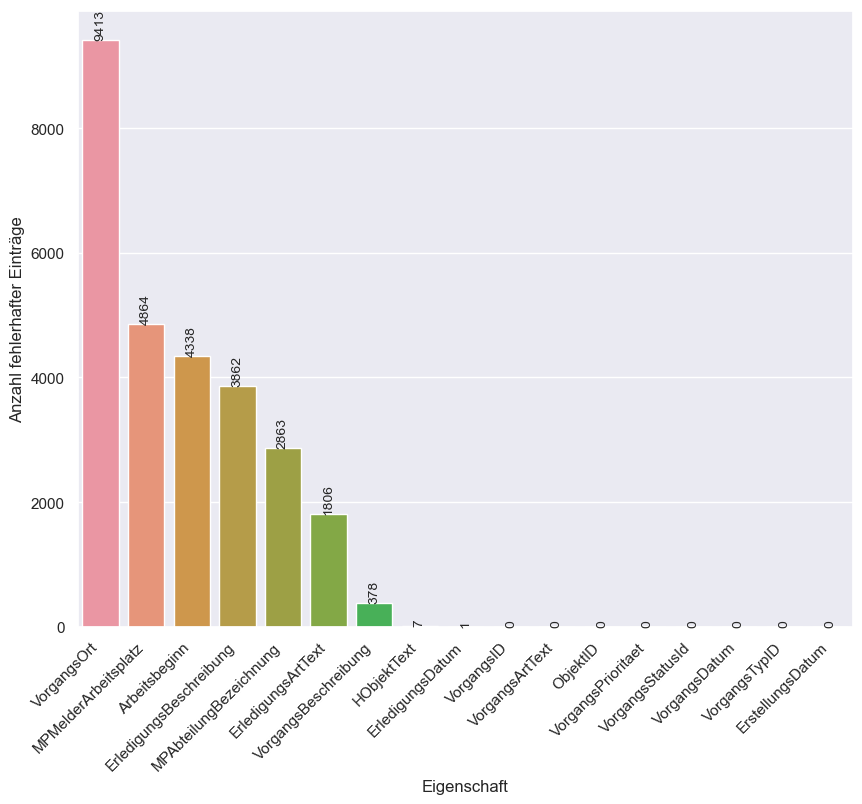

In [232]:
# absolute
fig, axes = plt.subplots(1, 1, figsize=(10,8))
axes = sns.barplot(data=df, x='Eigenschaft', y='Anzahl fehlerhafter Einträge')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
text = axes.bar_label(axes.containers[0], label_type='edge', rotation=90, fontsize='small')

In [233]:
if SAVE_FIGS:
    fig.savefig('NaN-absolute.svg', bbox_inches='tight')

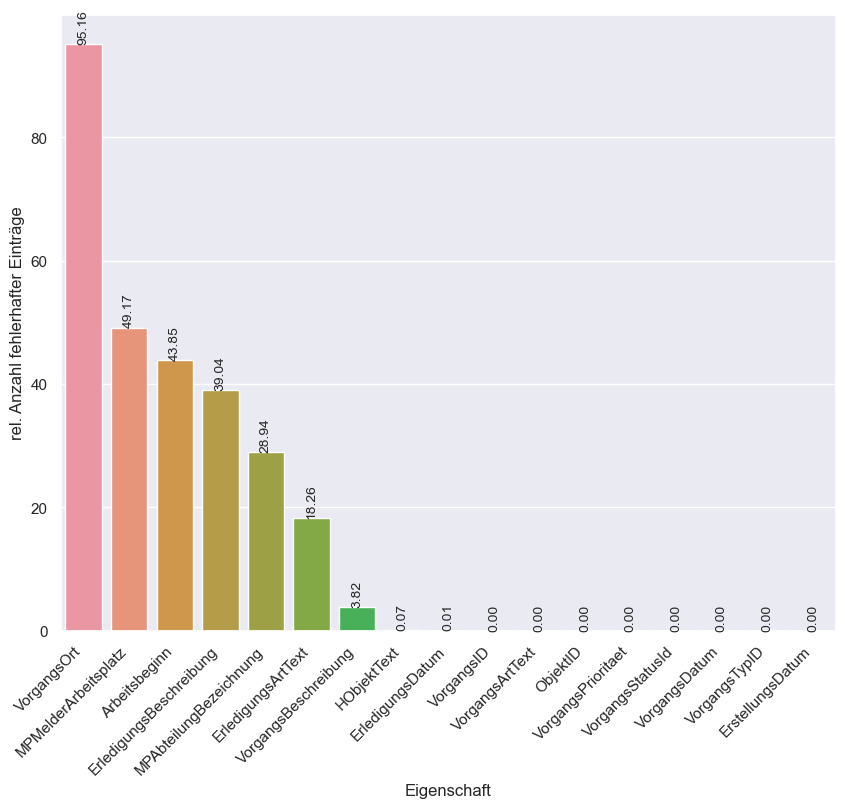

In [234]:
# relative
fig, axes = plt.subplots(1, 1, figsize=(10,8))
axes = sns.barplot(data=df, x='Eigenschaft', y='rel. Anzahl fehlerhafter Einträge')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')
text = axes.bar_label(axes.containers[0], fmt='{:.2f}', label_type='edge', rotation=90, fontsize='small')

In [235]:
if SAVE_FIGS:
    fig.savefig('NaN-relative.svg', bbox_inches='tight')

#### Prioritize properties
- only look at properties with high relevance
- high relevance associated with low number of NA entries

**Helper functions**

In [236]:
def filter_NA_entries_by_prop(df, df_na, prop, negate=False):
    
    if negate:
        return df.loc[~df_na[prop]].copy()
    else:
        return df.loc[df_na[prop]].copy()

In [237]:
df = filter_NA_entries_by_prop(df=data, df_na=NA, prop='HObjektText')
df.head()

VorgangsID  ObjektID HObjektText  VorgangsTypID VorgangsDatum  \
1073       26296         0         NaN              2    2023-01-23   
1803       22149         0         NaN              2    2022-09-12   
2954       21729         0         NaN              2    2022-08-19   
4045        9339         0         NaN              3    2019-09-02   
4407        3158         0         NaN              3    2019-06-27   

      VorgangsStatusId  VorgangsPrioritaet  \
1073                 1                   0   
1803                 1                   0   
2954                 1                   0   
4045                 5                   0   
4407                 5                   0   

                                   VorgangsBeschreibung  VorgangsOrt  \
1073                                                NaN          NaN   
1803                      Ladeluftverteiler, Trittstufe          NaN   
2954  Starterbatterie prüfen und ggf. ersetzen\n\nBa...          NaN   
4045                              Gewinde nachschneiden  Schlosserei   
4407  Maschinen- Status auf Stop bei laufender Maschine          NaN   

                      VorgangsArtText ErledigungsDatum ErledigungsArtText  \
1073             Versicherungsschaden       2023-01-23           Erledigt   
1803                        Reparatur       2022-09-20           Erledigt   
2954                Batterie tauschen       2022-08-25           Erledigt   
4045                 Kettbaum-Adapter       2019-09-02      Reparatur UTT   
4407  elektrischer Fehler (allgemein)       2019-07-01      Reparatur UTT   

                                ErledigungsBeschreibung MPMelderArbeitsplatz  \
1073                                                NaN                  NaN   
1803                                                NaN                  NaN   
2954                                                NaN                  NaN   
4045                           gewinde  nachgeschnitten              Weberei   
4407  DU getauscht. Maschine steht im Moment. Kräusl...              Weberei   

     MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
1073                    NaN           NaN       2023-01-23  
1803                    NaN           NaN       2022-09-23  
2954                    NaN           NaN       2022-08-19  
4045                Weberei    02.09.2019       2019-09-02  
4407                Weberei    01.07.2019       2019-06-27

In [238]:
df = filter_NA_entries_by_prop(df=data, df_na=NA, prop='MPAbteilungBezeichnung', negate=True)
df.head()

VorgangsID  ObjektID                                  HObjektText  \
474       26201       293       HAS-1.OG BT/C ZI.138, Bewohnerzimmer,    
475       26053       488                     HAS-3.OG BT/A FL, Flur,    
476       25672       495  HAS-3.OG BT/A ZI.301/302 , Bewohnerzimmer,    
477       25704       354             HAS-2.OG BT/C LR , Lager Küche,    
479       16199      2523     SP-HAUS C/EG ZI. C.008, Bewohnerzimmer,    

     VorgangsTypID VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
474              3    2023-01-18                 1                   0   
475              3    2023-01-10                 1                   0   
476              3    2022-12-30                 1                   0   
477              3    2023-01-02                 1                   0   
479              3    2022-02-15                 1                   0   

                                  VorgangsBeschreibung VorgangsOrt  \
474     Chipkarte von Fr. Jolig bei Dr. Hager einlesen         NaN   
475                          Bitte FFP2 Masken bringen         NaN   
476  Bitte bei Frau Müller an der vorderen Bettseit...         NaN   
477                dunkel- aus- kaputt- ohne Funktion.         NaN   
479                      Notrufklingel vom Bett defekt         NaN   

         VorgangsArtText ErledigungsDatum ErledigungsArtText  \
474   Chipkarte einlesen       2023-01-19           Erledigt   
475            Sonstiges       2023-01-11           Erledigt   
476            Sonstiges       2023-01-03           Erledigt   
477  Leuchtmittel defekt       2023-01-03           Erledigt   
479            Sonstiges       2022-02-22           Erledigt   

    ErledigungsBeschreibung MPMelderArbeitsplatz  \
474                     NaN                  NaN   
475                     NaN                  NaN   
476                     NaN                  NaN   
477                     NaN                  NaN   
479                     NaN                  NaN   

             MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
474          Haus am Silbersee WB 1           NaN       2023-01-18  
475          Haus am Silbersee WB 3           NaN       2023-01-10  
476    Haus am Silbersee Verwaltung           NaN       2022-12-30  
477  Haus am Silbersee Ergotherapie           NaN       2023-01-02  
479            Am Sonnenpark Pflege           NaN       2022-02-15

## VorgangsID

In [239]:
data = data_rem_dupl.copy()
print(f'Length data: {len(data)}')

Length data: 9892


In [240]:
data.head()

VorgangsID  ObjektID                                       HObjektText  \
0      105360      4594                     DU-04, Instandhaltung Küche,    
1        7257       241                            DU-LA-H12-10, ROB007,    
2        7317         0                                         HB-HVW-EG   
3       31673      4569  HB-LA-H1-20, Funkfernbedienung Kran 12A0357, HBC   
4       32908       467            DU-LA-H09-07, Schnelllauftor Halle 9,    

   VorgangsTypID VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0              2    2023-02-16                 2                   0   
1              2    2021-11-25                 0                   0   
2              2    2021-11-30                 0                   0   
3              2    2022-03-14                 0                   0   
4              2    2022-07-28                 5                   0   

                                VorgangsBeschreibung VorgangsOrt  \
0                                                NaN         NaN   
1  Hi,\n\nschaust Du Dir bitte einmal den Roboter...         NaN   
2                     Türkontakt Haupteingang prüfen   HB-HVW-EG   
3                Umschalter zeitweise ohne Funktion          NaN   
4                                                NaN         NaN   

                                     VorgangsArtText ErledigungsDatum  \
0           DU Neubau Spülmaschine - Neuanschaffungg       2023-03-21   
1  AKL Roboter 007 hat in letzter Zeit Greiferpro...       2021-11-29   
2                                  Türkontakt defekt       2021-11-30   
3                                   Schalter defekt?       2022-03-14   
4              Warnlampe innen - Leuchtmittel defekt       2022-08-10   

                         ErledigungsArtText  \
0       Service durch externen Dienstleiter   
1                                       NaN   
2  Instandsetzung durch Facility Management   
3  Instandsetzung durch Facility Management   
4                                       NaN   

                             ErledigungsBeschreibung MPMelderArbeitsplatz  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2  Türkontakt nachjustiert, Schließriegel der Tür...                  NaN   
3  Gehäuse geöffnet, Schalter geprüft, gereinigt,...                  NaN   
4                                  ausgetauscht ..ok                  NaN   

  MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
0                    NaN           NaN       2023-02-01  
1                    NaN           NaN       2021-11-25  
2                    NaN           NaN       2021-11-30  
3                    NaN           NaN       2022-03-14  
4                    NaN           NaN       2022-07-28

In [241]:
temp = data['VorgangsID']
uni= temp.unique()
uni = np.sort(uni)
dupl = temp[temp.duplicated()]
dupl = np.sort(dupl.unique()) # IDs with duplicates
len(temp)

9892

In [242]:
dupl_matches = dict()
dupl_matches_props = dict()
dupl_matches_collection = list()
# collection of information for dates
# [VorgangsID, num_matching_props, date_range]
data_date_range = list()

for vorgang_id in dupl:
    temp = data.loc[data['VorgangsID']==vorgang_id,:]
    
    # check every index combination
    combi = list(combinations(range(len(temp)), 2))
    
    dict_entry = list()
    dict_entry_props = list()
    total_num_dupl_matches = 0
    max_date_range = 0
    for (idx1, idx2) in combi:
        # number of matches without VorgangsID (duplicates)
        temp_dupl_matches = (temp.iloc[idx1,1:] == temp.iloc[idx2,1:])
        dupl_matches_collection.append(temp_dupl_matches.tolist())
        num_dupl_matches = temp_dupl_matches.sum()
        matching_props = temp.columns[1:][temp_dupl_matches]
        non_matching_props = temp.columns[1:][~temp_dupl_matches]
        total_num_dupl_matches += num_dupl_matches
        
        # date ranges
        date_range = temp.iloc[idx1,4] - temp.iloc[idx2,4]
        date_range = abs(date_range.days)
        if date_range > max_date_range:
            max_date_range = date_range
        
        dict_entry.append([(idx1, idx2), num_dupl_matches, (date_range)])
        dict_entry_props.append([(idx1, idx2), (matching_props, non_matching_props)])
        data_date_range.append([vorgang_id, num_dupl_matches, date_range])
    
    dict_entry.append([total_num_dupl_matches, max_date_range])
    dupl_matches[vorgang_id] = dict_entry
    dupl_matches_props[vorgang_id] = dict_entry_props
    
df = pd.DataFrame(data=dupl_matches_collection, columns=data.columns[1:])
df_date = pd.DataFrame(data=data_date_range, columns=['VorgangsID', 'num_matching_props', 'date_range'])

In [243]:
df.head()

ObjektID  HObjektText  VorgangsTypID  VorgangsDatum  VorgangsStatusId  \
0      True         True           True           True             False   
1     False        False          False          False             False   
2     False        False          False          False             False   
3      True         True           True           True             False   
4      True         True           True           True              True   

   VorgangsPrioritaet  VorgangsBeschreibung  VorgangsOrt  VorgangsArtText  \
0                True                  True         True            False   
1                True                 False        False            False   
2                True                 False        False            False   
3                True                  True        False             True   
4                True                  True        False            False   

   ErledigungsDatum  ErledigungsArtText  ErledigungsBeschreibung  \
0              True               False                     True   
1             False               False                    False   
2             False               False                    False   
3              True               False                     True   
4              True                True                     True   

   MPMelderArbeitsplatz  MPAbteilungBezeichnung  Arbeitsbeginn  \
0                 False                   False           True   
1                 False                   False          False   
2                 False                   False          False   
3                 False                   False           True   
4                  True                    True           True   

   ErstellungsDatum  
0              True  
1             False  
2             False  
3              True  
4              True

In [244]:
print(f'Number of entries: {len(df)}')
dupl_count_abs = df.sum().sort_values(ascending=False)
dupl_count_rel = dupl_count_abs / len(df)

Number of entries: 493


In [245]:
dupl_count_abs

VorgangsPrioritaet         479
VorgangsTypID              416
ErstellungsDatum           354
VorgangsStatusId           344
VorgangsDatum              342
ErledigungsDatum           337
VorgangsBeschreibung       326
ErledigungsArtText         313
Arbeitsbeginn              292
MPAbteilungBezeichnung     291
ErledigungsBeschreibung    282
ObjektID                   275
MPMelderArbeitsplatz       273
HObjektText                272
VorgangsArtText            102
VorgangsOrt                 17
dtype: int64

In [246]:
dupl_count_rel

VorgangsPrioritaet         0.971602
VorgangsTypID              0.843813
ErstellungsDatum           0.718053
VorgangsStatusId           0.697769
VorgangsDatum              0.693712
ErledigungsDatum           0.683570
VorgangsBeschreibung       0.661258
ErledigungsArtText         0.634888
Arbeitsbeginn              0.592292
MPAbteilungBezeichnung     0.590264
ErledigungsBeschreibung    0.572008
ObjektID                   0.557809
MPMelderArbeitsplatz       0.553753
HObjektText                0.551724
VorgangsArtText            0.206897
VorgangsOrt                0.034483
dtype: float64

In [247]:
df_date_sorted = df_date.sort_values(by='date_range', ascending=False)
df_date_sorted.head()

VorgangsID  num_matching_props  date_range
420      105449                   2        1335
417      105196                   1        1322
418      105335                   2        1309
419      105446                   1        1217
278       23040                   1        1113

Text(0, 0.5, 'date_range [days]')

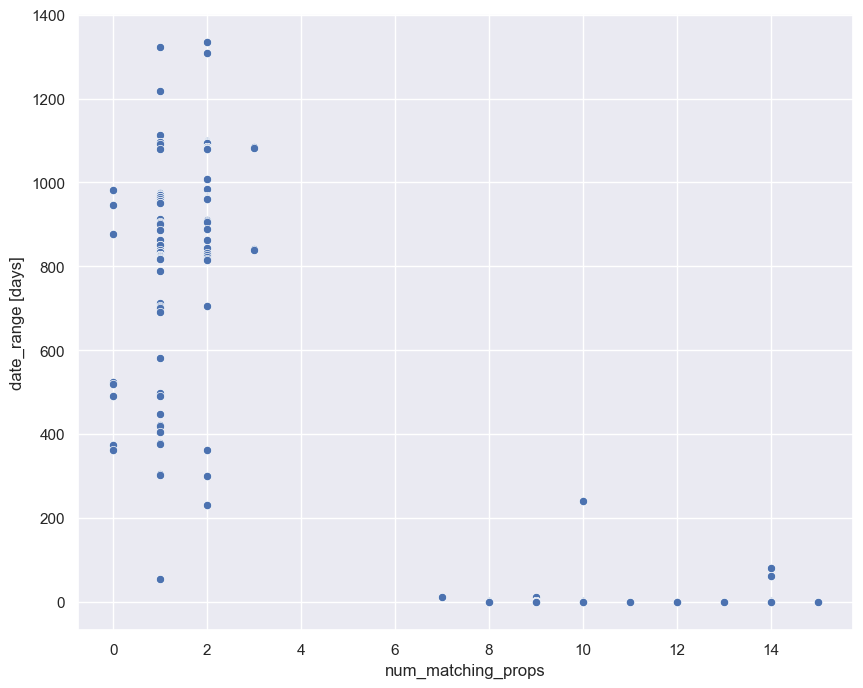

In [248]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
axes = sns.scatterplot(data=df_date_sorted, x='num_matching_props', y='date_range')
axes.set_ylabel('date_range [days]')

In [249]:
if SAVE_FIGS:
    fig.savefig('VorgangsID-duplicates_scatter.svg', bbox_inches='tight')

In [250]:
df_date_sorted

VorgangsID  num_matching_props  date_range
420      105449                   2        1335
417      105196                   1        1322
418      105335                   2        1309
419      105446                   1        1217
278       23040                   1        1113
..          ...                 ...         ...
157        3842                  14           0
156        3832                  14           0
155        3832                  14           0
154        3832                  14           0
492      261775                  14           0

[493 rows x 3 columns]

**Mean date range per number of matching properties**

Text(0, 0.5, 'mean date_range [days]')

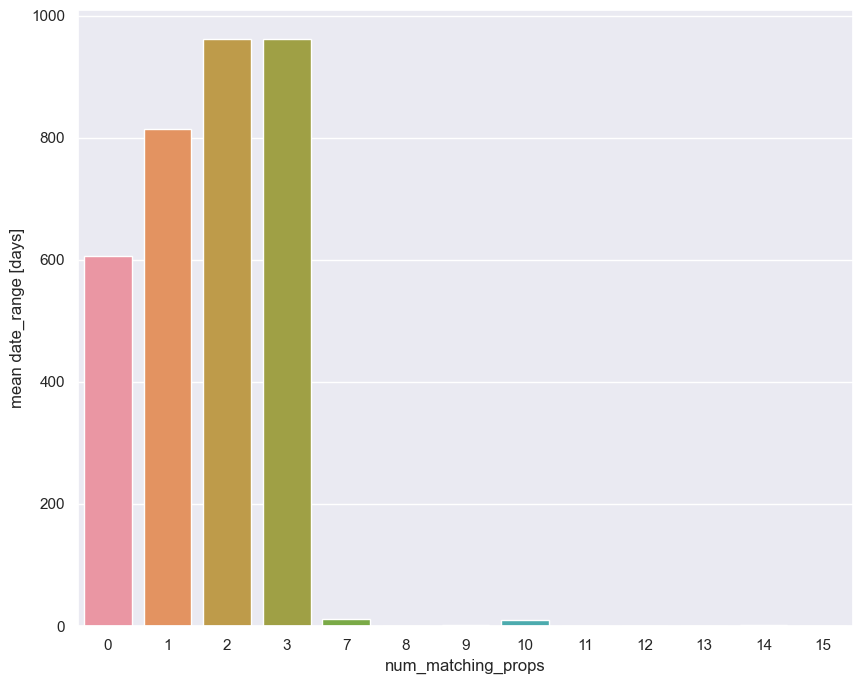

In [251]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
axes = sns.barplot(data=df_date_sorted, x='num_matching_props', y='date_range', errorbar=None)
axes.set_ylabel('mean date_range [days]')

In [252]:
if SAVE_FIGS:
    fig.savefig('VorgangsID-duplicates.svg', bbox_inches='tight')

In [253]:
dupl_matches

{17: [[(0, 1), 11, 0], [(0, 2), 1, 835], [(1, 2), 1, 835], [13, 835]],
 36: [[(0, 1), 11, 0], [11, 0]],
 54: [[(0, 1), 14, 0], [14, 0]],
 56: [[(0, 1), 13, 0], [13, 0]],
 74: [[(0, 1), 14, 0], [14, 0]],
 77: [[(0, 1), 14, 0], [14, 0]],
 79: [[(0, 1), 15, 0], [15, 0]],
 81: [[(0, 1), 14, 0], [14, 0]],
 85: [[(0, 1), 13, 0], [13, 0]],
 87: [[(0, 1), 14, 0], [14, 0]],
 91: [[(0, 1), 15, 0], [15, 0]],
 92: [[(0, 1), 14, 0], [14, 0]],
 94: [[(0, 1), 14, 0], [14, 0]],
 96: [[(0, 1), 14, 0], [14, 0]],
 97: [[(0, 1), 14, 0], [14, 0]],
 100: [[(0, 1), 14, 0], [14, 0]],
 102: [[(0, 1), 14, 0], [14, 0]],
 103: [[(0, 1), 14, 0], [14, 0]],
 106: [[(0, 1), 14, 0], [14, 0]],
 108: [[(0, 1), 14, 0], [14, 0]],
 116: [[(0, 1), 14, 0], [14, 0]],
 123: [[(0, 1), 14, 0], [14, 0]],
 124: [[(0, 1), 14, 0], [14, 0]],
 134: [[(0, 1), 14, 0], [14, 0]],
 140: [[(0, 1), 14, 0], [14, 0]],
 141: [[(0, 1), 14, 0], [14, 0]],
 142: [[(0, 1), 12, 0], [12, 0]],
 146: [[(0, 1), 14, 0], [14, 0]],
 147: [[(0, 1), 14, 0], [

In [254]:
dupl_matches_props

{17: [[(0, 1),
   (Index(['ObjektID', 'HObjektText', 'VorgangsTypID', 'VorgangsDatum',
           'VorgangsPrioritaet', 'VorgangsBeschreibung', 'VorgangsOrt',
           'ErledigungsDatum', 'ErledigungsBeschreibung', 'Arbeitsbeginn',
           'ErstellungsDatum'],
          dtype='object'),
    Index(['VorgangsStatusId', 'VorgangsArtText', 'ErledigungsArtText',
           'MPMelderArbeitsplatz', 'MPAbteilungBezeichnung'],
          dtype='object'))],
  [(0, 2),
   (Index(['VorgangsPrioritaet'], dtype='object'),
    Index(['ObjektID', 'HObjektText', 'VorgangsTypID', 'VorgangsDatum',
           'VorgangsStatusId', 'VorgangsBeschreibung', 'VorgangsOrt',
           'VorgangsArtText', 'ErledigungsDatum', 'ErledigungsArtText',
           'ErledigungsBeschreibung', 'MPMelderArbeitsplatz',
           'MPAbteilungBezeichnung', 'Arbeitsbeginn', 'ErstellungsDatum'],
          dtype='object'))],
  [(1, 2),
   (Index(['VorgangsPrioritaet'], dtype='object'),
    Index(['ObjektID', 'HObjektText', 'V

## Date ranges for date columns

In [255]:
date_ranges = dict()
for col in date_cols:
    max = data['VorgangsDatum'].max()
    min = data['VorgangsDatum'].min()
    
    date_ranges[col] = max - min

In [256]:
date_ranges

{'VorgangsDatum': Timedelta('2045 days 00:00:00'),
 'ErledigungsDatum': Timedelta('2045 days 00:00:00'),
 'ErstellungsDatum': Timedelta('2045 days 00:00:00')}

- 2045 days of range in data time stamps of all date columns

## Length of process descriptions
- ``VorgangsBeschreibung``
- ``VorgangsArtText``

In [257]:
props = ['VorgangsBeschreibung', 'VorgangsArtText']
prop = data_rem_dupl['VorgangsBeschreibung']
print(f"Number of NA vals: {prop.isna().sum()}")
prop = prop.dropna().reset_index(drop=True)

Number of NA vals: 378


In [258]:
props = ['VorgangsBeschreibung', 'VorgangsArtText']
prop_length_analysis: dict[str, tuple[DataFrame, Series]] = dict()

for prop in props:
    df = data_rem_dupl[prop]
    print(f"Number of NA vals for {prop}: {df.isna().sum()}")
    df = df.dropna().reset_index(drop=True)
    
    entry_list = df.to_list()
    df = df.to_frame()
    
    str_lengths = list()
    for idx, entry in enumerate(entry_list):
        entry = entry.replace('\n', '')
        entry = entry.replace(' ', '')
        entry_list[idx] = entry
        str_lengths.append(len(entry))
        
    df['prop_cleaned'] = entry_list
    df['prop_cleaned_length'] = str_lengths
    analysis_res = df['prop_cleaned_length'].describe()
    
    prop_length_analysis[prop] = (df, analysis_res)

Number of NA vals for VorgangsBeschreibung: 378
Number of NA vals for VorgangsArtText: 0


*Results for VorgangsBeschreibung*

In [259]:
prop_length_analysis[props[0]][1]

count    9514.000000
mean       72.399411
std        86.569560
min         0.000000
25%        28.000000
50%        46.000000
75%        81.000000
max      1296.000000
Name: prop_cleaned_length, dtype: float64

*Results for VorgangsArtText*

In [260]:
prop_length_analysis[props[1]][1]

count    9892.000000
mean       21.107157
std        11.738689
min         1.000000
25%        11.000000
50%        19.000000
75%        27.000000
max       133.000000
Name: prop_cleaned_length, dtype: float64

## ObjektID
- check uniqueness with ``HObjektText``

In [261]:
data_rem_dupl.head()

VorgangsID  ObjektID                                       HObjektText  \
0      105360      4594                     DU-04, Instandhaltung Küche,    
1        7257       241                            DU-LA-H12-10, ROB007,    
2        7317         0                                         HB-HVW-EG   
3       31673      4569  HB-LA-H1-20, Funkfernbedienung Kran 12A0357, HBC   
4       32908       467            DU-LA-H09-07, Schnelllauftor Halle 9,    

   VorgangsTypID VorgangsDatum  VorgangsStatusId  VorgangsPrioritaet  \
0              2    2023-02-16                 2                   0   
1              2    2021-11-25                 0                   0   
2              2    2021-11-30                 0                   0   
3              2    2022-03-14                 0                   0   
4              2    2022-07-28                 5                   0   

                                VorgangsBeschreibung VorgangsOrt  \
0                                                NaN         NaN   
1  Hi,\n\nschaust Du Dir bitte einmal den Roboter...         NaN   
2                     Türkontakt Haupteingang prüfen   HB-HVW-EG   
3                Umschalter zeitweise ohne Funktion          NaN   
4                                                NaN         NaN   

                                     VorgangsArtText ErledigungsDatum  \
0           DU Neubau Spülmaschine - Neuanschaffungg       2023-03-21   
1  AKL Roboter 007 hat in letzter Zeit Greiferpro...       2021-11-29   
2                                  Türkontakt defekt       2021-11-30   
3                                   Schalter defekt?       2022-03-14   
4              Warnlampe innen - Leuchtmittel defekt       2022-08-10   

                         ErledigungsArtText  \
0       Service durch externen Dienstleiter   
1                                       NaN   
2  Instandsetzung durch Facility Management   
3  Instandsetzung durch Facility Management   
4                                       NaN   

                             ErledigungsBeschreibung MPMelderArbeitsplatz  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2  Türkontakt nachjustiert, Schließriegel der Tür...                  NaN   
3  Gehäuse geöffnet, Schalter geprüft, gereinigt,...                  NaN   
4                                  ausgetauscht ..ok                  NaN   

  MPAbteilungBezeichnung Arbeitsbeginn ErstellungsDatum  
0                    NaN           NaN       2023-02-01  
1                    NaN           NaN       2021-11-25  
2                    NaN           NaN       2021-11-30  
3                    NaN           NaN       2022-03-14  
4                    NaN           NaN       2022-07-28

In [262]:
unique_ids = np.sort(data_rem_dupl['ObjektID'].unique())
len(unique_ids)

2243

In [263]:
# dict[object_id] = (num_occurences, num_differing_object_texts, differing_object_texts)
oid_associated_objects: dict[int, tuple[int, int, Series]] = dict()
oid_coll_data = list()

# count occurences
for ident in unique_ids:
    temp = data_rem_dupl.loc[data_rem_dupl['ObjektID']==ident,'HObjektText']
    num_occurences = len(temp)
    differing_object_texts = temp.unique()
    num_differing_object_texts = len(differing_object_texts)
    oid_associated_objects[ident] = (num_occurences, num_differing_object_texts, differing_object_texts)
    oid_coll_data.append([ident, num_occurences, num_differing_object_texts])

# collected data as frame
df = pd.DataFrame(data=oid_coll_data, columns=['object_id', 'num_occurences', 'num_differing_object_texts'])
df = df.sort_values(by='num_differing_object_texts', ascending=False, kind='stable')

In [264]:
df

object_id  num_occurences  num_differing_object_texts
0             0             484                         303
207         249              11                           5
209         251              10                           5
152         186              24                           4
189         231              17                           4
...         ...             ...                         ...
2238      12678               2                           1
2239      12680               1                           1
2240      12681               1                           1
2241      12684               1                           1
2242      12733               1                           1

[2243 rows x 3 columns]

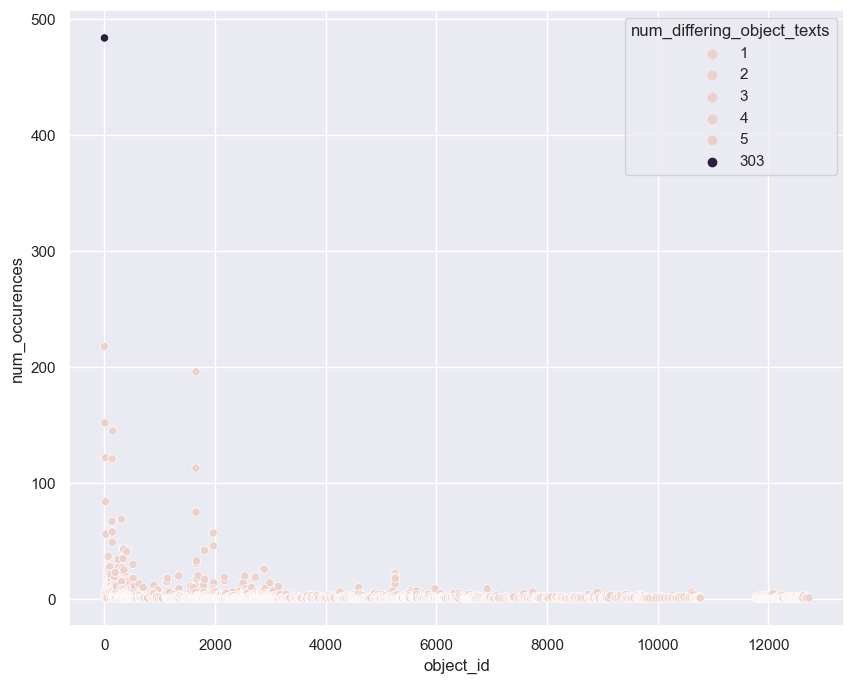

In [265]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
axes = sns.scatterplot(data=df, x='object_id', y='num_occurences', hue='num_differing_object_texts')

In [266]:
if SAVE_FIGS:
    fig.savefig('ObjektID-HObjektText_scatter.svg', bbox_inches='tight')

In [267]:
# only IDs which have multiple associated object texts
df_multiple = df.loc[df['num_differing_object_texts'] > 1, :]
print(f'Number of IDs with multiple associated object texts {len(df_multiple)}')
df.head()


Number of IDs with multiple associated object texts 404


object_id  num_occurences  num_differing_object_texts
0            0             484                         303
207        249              11                           5
209        251              10                           5
152        186              24                           4
189        231              17                           4

In [268]:
dupl_matches = dict()
dupl_matches_props = dict()
dupl_matches_collection = list()
# collection of information for dates
# [VorgangsID, num_matching_props, date_range]
data_date_range = list()

data = data_rem_dupl.copy()

for ident in unique_ids:
    temp = data.loc[data['ObjektID']==ident,:]
    
    filt = ~(data.columns == 'ObjektID')
    
    # check every index combination
    combi = list(combinations(range(len(temp)), 2))
    
    dict_entry = list()
    dict_entry_props = list()
    total_num_dupl_matches = 0
    max_date_range = 0
    for (idx1, idx2) in combi:
        # number of matches without VorgangsID (duplicates)
        temp_dupl_matches = (temp.iloc[idx1,filt] == temp.iloc[idx2,filt])
        dupl_matches_collection.append(temp_dupl_matches.tolist())
        num_dupl_matches = temp_dupl_matches.sum()
        matching_props = temp.columns[1:][temp_dupl_matches]
        non_matching_props = temp.columns[1:][~temp_dupl_matches]
        total_num_dupl_matches += num_dupl_matches
        
        # date ranges
        date_range = temp.iloc[idx1,4] - temp.iloc[idx2,4]
        date_range = abs(date_range.days)
        if date_range > max_date_range:
            max_date_range = date_range
        
        dict_entry.append([(idx1, idx2), num_dupl_matches, (date_range)])
        dict_entry_props.append([(idx1, idx2), (matching_props, non_matching_props)])
        data_date_range.append([vorgang_id, num_dupl_matches, date_range])
    
    dict_entry.append([total_num_dupl_matches, max_date_range])
    dupl_matches[ident] = dict_entry
    dupl_matches_props[ident] = dict_entry_props
    
df_objectid = pd.DataFrame(data=dupl_matches_collection, columns=data.columns[filt])
df_date_objectid = pd.DataFrame(data=data_date_range, columns=['ObjektID', 'num_matching_props', 'date_range'])

In [269]:
df_objectid.head()

VorgangsID  HObjektText  VorgangsTypID  VorgangsDatum  VorgangsStatusId  \
0       False        False           True          False              True   
1       False        False           True          False              True   
2       False        False           True           True              True   
3       False        False           True          False             False   
4       False        False           True          False             False   

   VorgangsPrioritaet  VorgangsBeschreibung  VorgangsOrt  VorgangsArtText  \
0               False                 False        False            False   
1                True                 False        False            False   
2                True                 False        False            False   
3                True                 False        False            False   
4                True                 False        False            False   

   ErledigungsDatum  ErledigungsArtText  ErledigungsBeschreibung  \
0             False               False                    False   
1             False                True                    False   
2             False                True                    False   
3             False                True                    False   
4             False               False                    False   

   MPMelderArbeitsplatz  MPAbteilungBezeichnung  Arbeitsbeginn  \
0                 False                   False          False   
1                 False                   False          False   
2                 False                   False          False   
3                 False                   False          False   
4                 False                   False          False   

   ErstellungsDatum  
0             False  
1             False  
2              True  
3             False  
4             False

In [270]:
df_objectid.sum().sort_values(ascending=False)

VorgangsPrioritaet         246375
VorgangsStatusId           203502
VorgangsTypID              196177
HObjektText                125040
MPAbteilungBezeichnung     121760
MPMelderArbeitsplatz       109429
ErledigungsArtText          99894
VorgangsArtText             58322
ErstellungsDatum             1329
VorgangsOrt                  1147
ErledigungsDatum             1119
VorgangsDatum                1065
VorgangsBeschreibung          922
Arbeitsbeginn                 802
ErledigungsBeschreibung       406
VorgangsID                    275
dtype: int64

In [271]:
df_date_sorted = df_date_objectid.sort_values(by='date_range', ascending=False)
df_date_sorted.head()

ObjektID  num_matching_props  date_range
257165    261775                   1        1925
257832    261775                   1        1880
257833    261775                   1        1838
257827    261775                   1        1796
258531    261775                   1        1778

In [272]:
print(f'Number of entries: {len(df_objectid)}')
dupl_count_abs = df_objectid.sum().sort_values(ascending=False)
dupl_count_rel = dupl_count_abs / len(df_objectid)

Number of entries: 261316


In [273]:
dupl_count_rel

VorgangsPrioritaet         0.942824
VorgangsStatusId           0.778758
VorgangsTypID              0.750727
HObjektText                0.478501
MPAbteilungBezeichnung     0.465949
MPMelderArbeitsplatz       0.418761
ErledigungsArtText         0.382273
VorgangsArtText            0.223186
ErstellungsDatum           0.005086
VorgangsOrt                0.004389
ErledigungsDatum           0.004282
VorgangsDatum              0.004076
VorgangsBeschreibung       0.003528
Arbeitsbeginn              0.003069
ErledigungsBeschreibung    0.001554
VorgangsID                 0.001052
dtype: float64

Text(0, 0.5, 'mean date_range [days]')

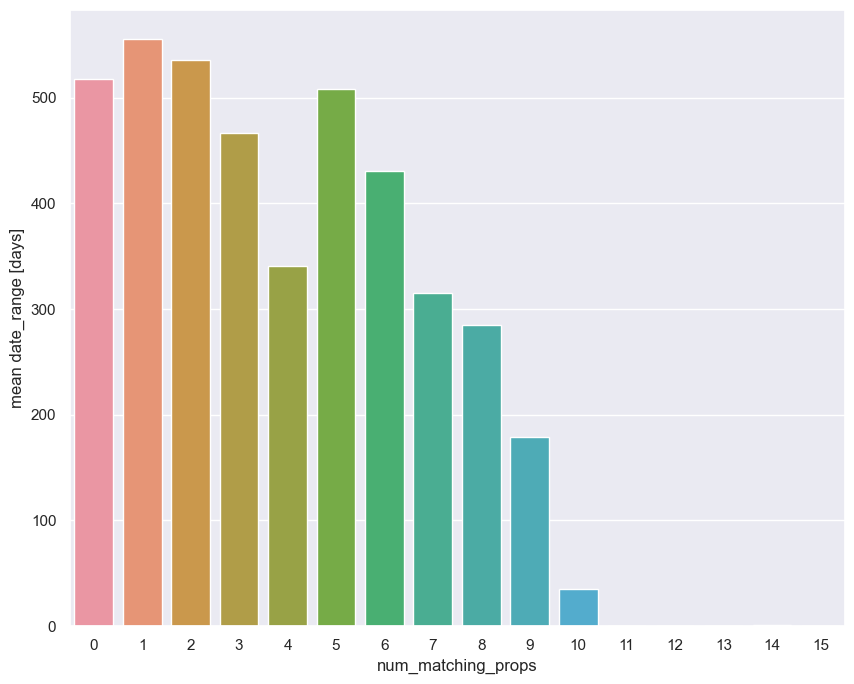

In [274]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
axes = sns.barplot(data=df_date_sorted, x='num_matching_props', y='date_range', errorbar=None)
axes.set_ylabel('mean date_range [days]')

In [275]:
if SAVE_FIGS:
    fig.savefig('ObjektID-duplicates.svg', bbox_inches='tight')

Text(0, 0.5, 'date_range [days]')

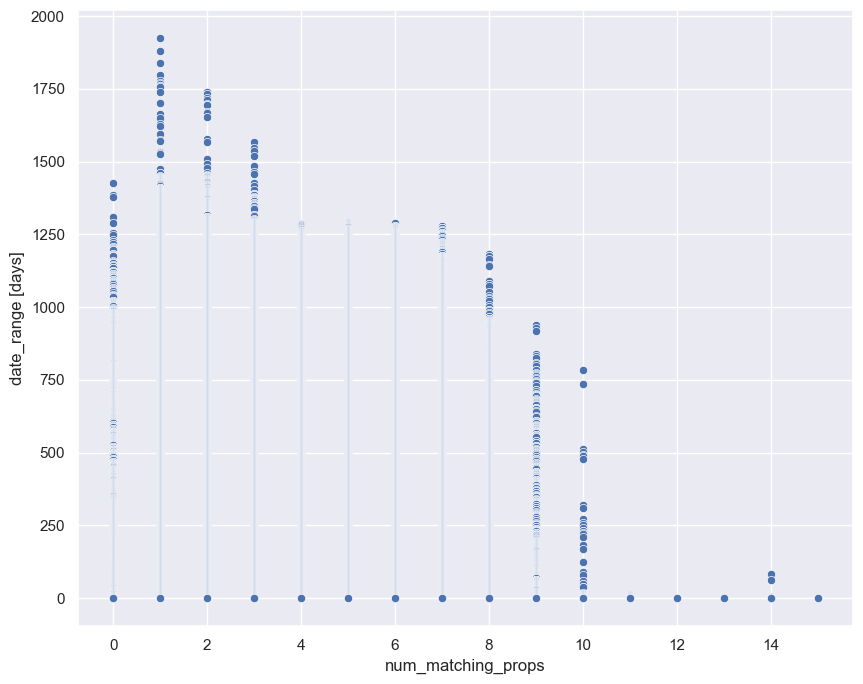

In [276]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))
axes = sns.scatterplot(data=df_date_sorted, x='num_matching_props', y='date_range')
axes.set_ylabel('date_range [days]')